# House Prices: Advanced Regression Techniques

# Table of contents

<a href='#introduction'>Introduction</a> <br>
<a href='#data'>The data</a> <br>
<a href='#cleaning_data'>Cleaning data</a> <br>
<a href='#data split and standarization'>Data split and standarization</a> <br>
<a href='#pca'>PCA</a> <br>
<a href='#linear regression'>Linear regression</a> <br>
<a href='#lasso regression'>Lasso regression</a> <br>
<a href='#elastic net regression'>Elastic Net regression</a> <br>
<a href='#random forrest regression'>Random forrest regression</a> <br>
<a href='#ridge regression'>Ridge regression</a> <br>
<a href='#multi-layer perceptron regressor'>Neural Network - Multi-layer Perceptron regressor</a> <br>
<a href='#conclusion'>Conclusion</a>

# <a id='introduction'>Introduction</a>

The purpose of the analysis is to try to predict the sale price of each of the houses.
The entire analysis is based on a data set containing 81 variables describing residential homes in the city of Ames in the state of Iowa in the United States. <br>
A complete list of variables with their description is available in the given file: <a href='data_description.txt'>Data file</a> <br>
The data has been downloaded from the site: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# <a id='data'>The data</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The following table shows a fragment of the data set on which further analysis will be based.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Basic information about numeric variables included in the dataset:

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# <a id='cleaning_data'>Cleaning data</a>

You can start the data cleanup process by writing column names and checking in which columns data is missing.

The following function returns column names and missing values in these columns.

In [4]:
def col_view():
    for i in df.columns:
        val = df[i].isnull().sum() 
        if val != 0:
            print(i,val)
        
col_view()

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


The above list shows that there are columns in the data set that have large gaps in the data. You must delete them.

In [5]:
del df['LotFrontage']
del df['Alley']
del df['FireplaceQu']
del df['PoolQC']
del df['Fence']
del df['MiscFeature']

# Lack in data

The rest of the variables should be analyzed separately and modified accordingly. For categorical variables, in the absence location, add a new class "Unknown", and for numeric variables, fill in gaps, eg with an average value.

MasVnrType variable

In [6]:
print( df['MasVnrType'].value_counts() )
df['MasVnrType'].fillna('Unknown', inplace=True)
df['MasVnrType'].isnull().sum()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


0

MasVnrArea variable

In [7]:
print( df['MasVnrArea'].value_counts() )
df['MasVnrArea'].fillna('0.0', inplace=True)
df['MasVnrArea'].isnull().sum()
df['MasVnrArea'] = df['MasVnrArea'].astype(float)

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64


Electrical variable

In [8]:
print( df['Electrical'].value_counts() )
df['Electrical'].fillna('SBrkr', inplace=True)
df['Electrical'].isnull().sum()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


0

BsmtQual variable

In [9]:
print( df['BsmtQual'].value_counts() )
df['BsmtQual'].fillna('Unknown', inplace=True)
df['BsmtQual'].isnull().sum()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


0

BsmtCond variable

In [10]:
print( df['BsmtCond'].value_counts() )
df['BsmtCond'].fillna('Unknown', inplace=True)
df['BsmtCond'].isnull().sum()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


0

BsmtExposure variable

In [11]:
print( df['BsmtExposure'].value_counts() )
df['BsmtExposure'].fillna('Unknown', inplace=True)
df['BsmtExposure'].isnull().sum()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


0

BsmtFinType1 variable

In [12]:
print( df['BsmtFinType1'].value_counts() )
df['BsmtFinType1'].fillna('Unknown', inplace=True)
df['BsmtFinType1'].isnull().sum()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


0

BsmtFinType2 variable

In [13]:
print( df['BsmtFinType2'].value_counts() )
df['BsmtFinType2'].fillna('Unknown', inplace=True)
df['BsmtFinType2'].isnull().sum()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


0

GarageType variable

In [14]:
print( df['GarageType'].value_counts() )
df['GarageType'].fillna('Unknown', inplace=True)
df['GarageType'].isnull().sum()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


0

GarageYrBlt variable

In [15]:
print( df['GarageYrBlt'].value_counts() )
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['GarageYrBlt'].isnull().sum()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


0

GarageFinish variable

In [16]:
print( df['GarageFinish'].value_counts() )
df['GarageFinish'].fillna('Unknown', inplace=True)
df['GarageFinish'].isnull().sum()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


0

GarageQual variable

In [17]:
print( df['GarageQual'].value_counts() )
df['GarageQual'].fillna('Unknown', inplace=True)
df['GarageQual'].isnull().sum()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


0

GarageCond variable

In [18]:
print( df['GarageCond'].value_counts() )
df['GarageCond'].fillna('Unknown', inplace=True)
df['GarageCond'].isnull().sum()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


0

# Other variables

The following variables do not provide relevant information for analysis, so they must be removed.

In [19]:
del df['Utilities']
del df['3SsnPorch']
del df['LowQualFinSF']
del df['Id']

# Date format variables

In dataset there are some variables representing time values. Those variables need to a different form 
which they will represent for example not the year of construction but certain number of years from the construction.
This can be achieved by subtracting the current date from the date of construction

In [20]:
import datetime
now = datetime.datetime.now()
print(now.year)

2018


In [21]:
df['YearBuilt'] = now.year - df['YearBuilt']
df['YearRemodAdd'] = now.year - df['YearRemodAdd']
df['GarageYrBlt'] = now.year - df['GarageYrBlt']
df['YrSold'] = now.year - df['YrSold']

In order to check the correctness of the activities carried out, 
we need to make sure that all deficiencies have been corrected
by checking if all gaps are equal to zero.

In [22]:
for i in df.columns:
    val = df[i].isnull().sum() 
    if val == 0:
        print(i,val)

MSSubClass 0
MSZoning 0
LotArea 0
Street 0
LotShape 0
LandContour 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice 0


# One-hot encoding

For further analysis it is necessary to conduct the so-called one-hot encoding, or conversion of categorical values into zero-one variables. checking if all gaps are equal to zero

The following two lists show zero-one variables - categorical (dummies_columns) and numeric (non_dummies_columns).
Both lists should be reduced to tabular form and combined into one table.

In [23]:
dummies_columns = [
df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape'],
df['LandContour'],df['LotConfig'],df['LandSlope'],df['Neighborhood'],
df['Condition1'],df['Condition2'],df['BldgType'],df['HouseStyle'],
df['RoofStyle'],df['RoofMatl'],df['Exterior1st'],df['Exterior2nd'],
df['MasVnrType'],df['ExterQual'],df['ExterCond'],df['Foundation'],
df['BsmtQual'],df['BsmtCond'],df['BsmtExposure'],df['BsmtFinType1'],
df['BsmtFinType2'],df['Heating'],df['HeatingQC'],df['CentralAir'],
df['Electrical'],df['KitchenQual'],df['Functional'],df['GarageType'],
df['GarageFinish'],df['GarageQual'],df['GarageCond'],df['PavedDrive'],
df['SaleType'],df['SaleCondition']      
]

non_dummies_columns = [
df['LotArea'],df['OverallQual'],df['OverallCond'],df['YearBuilt'],
df['YearRemodAdd'],
df['MasVnrArea'],
df['BsmtFinSF1'],df['BsmtFinSF2'],
df['BsmtUnfSF'],df['TotalBsmtSF'],df['1stFlrSF'],df['2ndFlrSF'],
df['GrLivArea'],df['BsmtFullBath'],df['BsmtHalfBath'],
df['FullBath'],df['HalfBath'],df['BedroomAbvGr'],df['KitchenAbvGr'],
df['TotRmsAbvGrd'],df['Fireplaces'],df['GarageYrBlt'],df['GarageCars'],
df['GarageArea'],df['WoodDeckSF'],df['OpenPorchSF'],df['EnclosedPorch'],
df['ScreenPorch'],df['PoolArea'],df['MiscVal'],
df['MoSold'],df['YrSold'],df['SalePrice']  
]

Dummies table:

In [24]:
df_dummies = []
for i in dummies_columns:
    df_dummies.append(pd.get_dummies(i))
    
df_dummies = pd.concat(df_dummies,axis=1)
df_dummies.head()

,20,30,40,45,50,60,70,75,80,85,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Non dummies table:

In [25]:
df_non_dummies_columns=[]
for i in non_dummies_columns:
    df_non_dummies_columns.append(i)
    
df_non_dummies_columns=pd.concat(df_non_dummies_columns,axis=1)
df_non_dummies_columns.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,8450,7,5,15,15,196.0,706,0,150,856,...,548,0,61,0,0,0,0,2,10,208500
1,9600,6,8,42,42,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,5,11,181500
2,11250,7,5,17,16,162.0,486,0,434,920,...,608,0,42,0,0,0,0,9,10,223500
3,9550,7,5,103,48,0.0,216,0,540,756,...,642,0,35,272,0,0,0,2,12,140000
4,14260,8,5,18,18,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,12,10,250000


Final data table:

In [26]:
final_data = pd.concat([df_dummies,df_non_dummies_columns],axis=1)
final_data.head()

,20,30,40,45,50,60,70,75,80,85,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,548,0,61,0,0,0,0,2,10,208500
1,1,0,0,0,0,0,0,0,0,0,...,460,298,0,0,0,0,0,5,11,181500
2,0,0,0,0,0,1,0,0,0,0,...,608,0,42,0,0,0,0,9,10,223500
3,0,0,0,0,0,0,1,0,0,0,...,642,0,35,272,0,0,0,2,12,140000
4,0,0,0,0,0,1,0,0,0,0,...,836,192,84,0,0,0,0,12,10,250000


# <a id='data split and standarization'>Data split and standarization</a>

For further analysis it is necessary to divide data into test and training and to standardize variables.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

The variable y must be separated from the set and saved in a separate variable.

In [28]:
y = df_non_dummies_columns['SalePrice']
del df_non_dummies_columns['SalePrice']

In [29]:
# splitting data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.33, random_state=20)

X_train = X_train.values # X_train represents training part of data
X_test = X_test.values # X_test represents testing part of data

y_train = y_train.values.reshape(-1, 1) # y_train represents training part of y data
y_test = y_test.values.reshape(-1, 1) # y_train represents training part of y data

In [30]:
X_scaler = StandardScaler(with_mean=True, with_std=True) # the standar scaler is assigning to X_scaler variable
X_scaler.fit(X_train) # fitting standard scaler to X_train (calculating mean and variance)
X_train_scaled = X_scaler.transform(X_train) # scaling X_train set
X_test_scaled = X_scaler.transform(X_test) # scaling X_test set

Y_scaler = StandardScaler(with_mean=True, with_std=True)
Y_scaler.fit(y_train.reshape(-1,1))
y_train_scaled = Y_scaler.transform(y_train) # scaling y_train set
y_test_scaled = Y_scaler.transform(y_test) # scaling y_test set

# <a id='pca'>PCA - reduction of data dimensions.</a>

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
% matplotlib inline

In [32]:
pca = PCA(100) # setting number of components to 100
X_train_pca100 = pca.fit_transform(X_train_scaled) # 
X_test_pca100 = pca.transform(X_test_scaled) # transform X_test_scaled set
explained_variance = pca.explained_variance_ratio_ # calculate explained ratio

In [33]:
print( pca.explained_variance_ratio_ )

[ 0.07011773  0.03077629  0.0286153   0.02511796  0.0222592   0.01975043
  0.01745891  0.01647659  0.01373682  0.01312998  0.0127597   0.01248419
  0.01101148  0.01091368  0.01060335  0.0104309   0.01032183  0.01000427
  0.00985821  0.00962885  0.00928943  0.00904699  0.00889165  0.00883855
  0.00859131  0.00849057  0.00843822  0.0082724   0.00792785  0.00777962
  0.007702    0.00757832  0.00749935  0.00732092  0.00720116  0.00708601
  0.00705206  0.00697631  0.0068858   0.00675592  0.00659905  0.00656449
  0.00645399  0.00629898  0.00620411  0.00609169  0.00599709  0.00595079
  0.00588184  0.00587103  0.00575327  0.00565628  0.00552489  0.0055061
  0.00547077  0.00542727  0.00534723  0.00526419  0.00521815  0.00519081
  0.00510782  0.00503386  0.00497026  0.00492258  0.00489994  0.00480877
  0.00472186  0.00468667  0.00459872  0.00450944  0.00449289  0.00443702
  0.00438047  0.00435236  0.00430212  0.00420455  0.00417389  0.00409713
  0.00405976  0.00403639  0.00401359  0.00397768  0.

# Elbow method

On the basis of the representative "elbow method", the number of component variables that are sufficient to describe the whole set is determined.

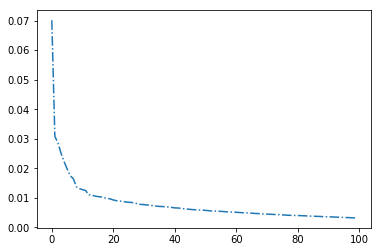

In [34]:
plt.plot(pca.explained_variance_ratio_, '-.')

The above chart shows that the optimal value is 20 variables.

The number of data from the training and test set should be transformed to 20 variables according to the above method.

In [35]:
X_train = X_train_pca100[:,:20] # first 20 principal components for train set
X_test = X_test_pca100[:,:20] # first 20 principal components for test set

# Automatization

The function implemented below will be used to improve and facilitate further analysis.

The calculate_reg_metrics function returns metrics calculated on the base
test and training values of y, and then displays them.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
def calculate_reg_metrics(y_train_scaled, y_test_scaled, model, X_train, X_test, name):
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    mse_train = mean_squared_error(y_train_scaled, y_pred_train)
    r2_train = r2_score(y_train_scaled, y_pred_train)
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    
    mse_test = mean_squared_error(y_test_scaled, y_pred_test)
    r2_test = r2_score(y_test_scaled, y_pred_test)
    mae_test = mean_absolute_error(y_test_scaled, y_pred_test)
      
    data = pd.DataFrame(index=[name],
                        data={'train mse':[mse_train], 
                              'train r2':[r2_train],
                              'train mae':[mae_train],
                              'test mse':[mse_test],
                              'test r2':[r2_test],
                              'test mae':[mae_test]} )    
    return data

# <a id='linear regression'>Linear regression</a>

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression() # initializing model
model.fit(X_train, y_train_scaled) # fitting model to training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
linear_reg_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model, X_train, X_test, 'linear')
linear_reg_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
linear,0.24828,0.178887,0.814022,0.248472,0.159634,0.840366


# <a id='lasso regression'>Lasso regression</a>

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [42]:
lasso_params={
    "Lasso regression__alpha":[0.0001,0.001,0.01,0.1]
}

pipe = Pipeline([                  
                 ('Lasso regression', Lasso())
                ])

grid = GridSearchCV(pipe , lasso_params, 
                    cv=5, refit=True)

In [43]:
grid.fit(X_train, y_train_scaled) # fitting grid search to training data 
print(grid.best_params_) # printing best parameters

{'Lasso regression__alpha': 0.01}


In [44]:
model_lasso = grid.best_estimator_ # getting the best estimator
model_lasso

Pipeline(steps=[('Lasso regression', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [45]:
lasso_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model, X_train, X_test, 'lasso')
lasso_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
lasso,0.24828,0.178887,0.814022,0.248472,0.159634,0.840366


# <a id='elastic net regression'>Elastic Net regression</a>

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic_net_params = {   
    "Elastic Net regression__alpha":[1.0,2.0,10.0],
    "Elastic Net regression__l1_ratio":[1.0,2.0,10.0]
}
pipe = Pipeline([                  
                 ('Elastic Net regression', ElasticNet())
                ])

grid = GridSearchCV(pipe , elastic_net_params, 
                    cv=5, refit=True)

In [48]:
grid.fit(X_train, y_train_scaled) # fitting grid search to training data
print(grid.best_params_) # printing best parameters

{'Elastic Net regression__alpha': 1.0, 'Elastic Net regression__l1_ratio': 1.0}


In [49]:
model_elsatic_net = grid.best_estimator_ # getting best estimator
model_elsatic_net

Pipeline(steps=[('Elastic Net regression', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

In [50]:
elastic_net_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model, X_train, X_test, 'elastic net')
elastic_net_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
elastic net,0.24828,0.178887,0.814022,0.248472,0.159634,0.840366


# <a id='random forrest regression'>Random forrest regression</a>

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
random_forest_params = {
    "Random forrest regression__max_features": ["sqrt", "log2"],
    "Random forrest regression__max_depth": [2,3,4,5],
    "Random forrest regression__n_estimators": [100,200,300]
}
pipe = Pipeline([                  
                 ('Random forrest regression', RandomForestRegressor())
                ])

grid = GridSearchCV(pipe , random_forest_params, 
                    cv=5, refit=True)

In [53]:
grid.fit(X_train, y_train_scaled) # fitting grid search to training data 
print(grid.best_params_) # printing best parameters

{'Random forrest regression__max_depth': 5, 'Random forrest regression__max_features': 'log2', 'Random forrest regression__n_estimators': 200}


In [54]:
model_random_forrest = grid.best_estimator_# getting the best estimator
model_random_forrest

Pipeline(steps=[('Random forrest regression', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [55]:
random_forrest_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model_random_forrest, X_train, X_test, 'random forrest')
random_forrest_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
random forrest,0.35505,0.292555,0.695848,0.307854,0.182688,0.817312


# <a id='ridge regression'>Ridge regression</a>

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge_params={
    "Ridge regression__alpha":[0.0001,0.001,0.01,0.1,1]
}
pipe = Pipeline([                  
                 ('Ridge regression', Ridge())
                ])

grid = GridSearchCV(pipe , ridge_params, 
                    cv=5, refit=True)

In [58]:
grid.fit(X_train, y_train_scaled) # fitting grid search to training data
print(grid.best_params_) # printing best parameters

{'Ridge regression__alpha': 1}


In [59]:
model_ridge = grid.best_estimator_ #getting best estimator
model_ridge

Pipeline(steps=[('Ridge regression', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [60]:
ridge_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model_ridge, X_train, X_test,'ridge')
ridge_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
ridge,0.248279,0.178889,0.81402,0.248462,0.159634,0.840366


# <a id='multi-layer perceptron regressor'>Neural Network - Multi-layer Perceptron regressor</a>

In [61]:
from sklearn.neural_network import MLPRegressor

In [62]:
nn_params = {
    "MLPRegressor__hidden_layer_sizes": [[10],[20],[30],[10,10]],
    "MLPRegressor__alpha":[0.0001,0.001,0.01,0.1], 
    "MLPRegressor__learning_rate":['constant', 'invscaling', 'adaptive'] ,
    "MLPRegressor__batch_size":[50,100],
    "MLPRegressor__max_iter":[500,1000,1500]
}
pipe = Pipeline([                  
                 ('MLPRegressor', MLPRegressor())
                ])

grid = GridSearchCV(pipe , nn_params, 
                    cv=5, refit=True)

In [63]:
grid.fit(X_train, y_train_scaled) # fitting grid search to training data 
print(grid.best_params_) # printing best parameters

{'MLPRegressor__alpha': 0.01, 'MLPRegressor__batch_size': 50, 'MLPRegressor__hidden_layer_sizes': [10, 10], 'MLPRegressor__learning_rate': 'invscaling', 'MLPRegressor__max_iter': 1500}


In [64]:
model_mlpr = grid.best_estimator_ # getting the best estimator
model_mlpr

Pipeline(steps=[('MLPRegressor', MLPRegressor(activation='relu', alpha=0.01, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [65]:
mlpr_metrics = calculate_reg_metrics(y_train_scaled, y_test_scaled,  model_mlpr, X_train, X_test, 'mlpr')
mlpr_metrics # printing table with metrics

,test mae,test mse,test r2,train mae,train mse,train r2
mlpr,0.257562,0.169751,0.82352,0.199617,0.077356,0.922644


# <a id='conclusion'>Conclusions</a>

List of metrics for each regressions:

In [66]:
data = [
    linear_reg_metrics,
    lasso_metrics,
    elastic_net_metrics,
    random_forrest_metrics,
    ridge_metrics,
    mlpr_metrics
]

Table of metrics for each regressions:

In [67]:
results = pd.concat(data) 
results.sort_values('test mse')

,test mae,test mse,test r2,train mae,train mse,train r2
mlpr,0.257562,0.169751,0.823520,0.199617,0.077356,0.922644
linear,0.248280,0.178887,0.814022,0.248472,0.159634,0.840366
lasso,0.248280,0.178887,0.814022,0.248472,0.159634,0.840366
elastic net,0.248280,0.178887,0.814022,0.248472,0.159634,0.840366
ridge,0.248279,0.178889,0.814020,0.248462,0.159634,0.840366
random forrest,0.355050,0.292555,0.695848,0.307854,0.182688,0.817312


# Testing the best model

The table above shows that the best model is a neural network. The next step is to scale back the values from the test set to compare how our predicted results differed from the test results.

In [79]:
predicted_test_y = model_mlpr.predict(X_test)

In [80]:
predicted_test_y_dollars = Y_scaler.inverse_transform(predicted_test_y) 
predicted_test_y_dollars

array([  42090.93181785,  243628.42757071,  110204.5524009 ,
        362067.40915919,  151128.8688939 ,  335056.62301017,
        180825.54719208,  186807.50435033,  149322.25944683,
        221700.52753024,  296736.80689119,  102194.2452394 ,
        198068.39405953,  152148.09116932,  122178.87309411,
        135303.81824159,  136422.73552165,  105818.80211661,
        197594.29965621,  166695.81082641,  144136.80133315,
        191806.33379853,  334707.09502764,  126974.04833752,
        190140.24739719,  134241.01500101,  134110.8162323 ,
        145569.47100492,  111997.36450461,   77581.66689278,
        113071.41885079,  286374.73411961,  204484.55586118,
         62280.60629927,   99634.75593772,  179477.84761761,
        147232.5917485 ,  204475.63480032,  146041.21159872,
        245372.4211271 ,  124116.6931969 ,  123117.85820713,
        281576.02363946,  126008.42868573,  188029.08527358,
        165096.98676202,  147144.80019596,  430192.75075402,
        237027.14971289,

The following "dollars" table shows the predicted and test values of y and the module with the difference of these values.

In [81]:
dollars = pd.DataFrame(data={'y test dollars':y_test.flatten(),'predicted y test dollars':predicted_test_y_dollars})
dollars['difference'] = dollars['predicted y test dollars'] - dollars['y test dollars']
dollars['abs difference'] = abs(dollars['difference'])
dollars

,predicted y test dollars,y test dollars,difference,abs difference
0,42090.931818,127500,-85409.068182,85409.068182
1,243628.427571,324000,-80371.572429,80371.572429
2,110204.552401,82500,27704.552401,27704.552401
3,362067.409159,335000,27067.409159,27067.409159
4,151128.868894,149500,1628.868894,1628.868894
5,335056.623010,275000,60056.623010,60056.623010
6,180825.547192,240000,-59174.452808,59174.452808
7,186807.504350,210000,-23192.495650,23192.495650
8,149322.259447,161750,-12427.740553,12427.740553
9,221700.527530,260000,-38299.472470,38299.472470


Negative values indicate underestimation and positive values about overestimation relative to test values.

# Data visualization

In [82]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Histogram

In [83]:
data = [go.Histogram(x=dollars['difference'])]
py.iplot(data, filename='basic histogram')

# Box plot

In [84]:
 trace0 = go.Box(
    y=dollars['difference']
)

data = [trace0]
py.iplot(data)

# Metrics:

In [85]:
trace1 = go.Bar(
    x=results.index,
    y=results['test r2'],
    name='test r2'
)
trace2 = go.Bar(
    x=results.index,
    y=results['train r2'],
    name='train r2'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    
    title='R2 metric',
    xaxis=dict(
        title='Model',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Test value',
        titlefont=dict(
            family='Courier New, monospace',
            size=25,
            color='#7f7f7f'
        )
    ) 
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [86]:
trace1 = go.Bar(
    x=results.index,
    y=results['test mae'],
    name='test mae'
)
trace2 = go.Bar(
    x=results.index,
    y=results['train mae'],
    name='train mae'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    
    title='MAE metric',
    xaxis=dict(
        title='Model',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Test value',
        titlefont=dict(
            family='Courier New, monospace',
            size=25,
            color='#7f7f7f'
        )
    ) 
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [87]:
trace1 = go.Bar(
    x=results.index,
    y=results['test mse'],
    name='test mse'
)
trace2 = go.Bar(
    x=results.index,
    y=results['train mse'],
    name='train mse'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    
    title='MSE metric',
    xaxis=dict(
        title='Model',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Test value',
        titlefont=dict(
            family='Courier New, monospace',
            size=25,
            color='#7f7f7f'
        )
    ) 
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')